In [1]:
import sys

sys.path.append('../')

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import DataLoader
from torch.metrics import accuracy_score
from torch.optim import RMSProp, Momentum, Adam, SGD

from sklearn.model_selection import train_test_split

np.random.seed(54)

sns.set_theme()

In [3]:
df = pd.read_csv('mnist.csv').to_numpy()

In [4]:
Y = np.array(pd.get_dummies(df[:, -1]))
X = np.array(df[:, :-1])
X = (X / 255).astype('float32')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
df = pd.DataFrame({
    'Epoch': [],
    'Activation Function': [],
    'Train Loss': [],
    'Test Loss': [],
    'Train Accuracy': [],
    'Test Accuracy': []
})

# Sigmoid

In [6]:
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.Sigmoid(),
    nn.Dropout(pKeep=0.8),

    nn.Linear(512, 256),
    nn.Sigmoid(),
    
    nn.Linear(256, 128),
    nn.Sigmoid(),
    
    nn.Linear(128, 64),
    nn.Sigmoid(),

    nn.Linear(64, 10),
    nn.SoftMax(),
)

# Params
epochs = 60
eval_every = 1
batch_size = 1024
criterion = nn.CrossEntropy()

optimizer = Adam(model)

for epoch in range(epochs):
    for x, y in DataLoader(X_train, Y_train, batch_size=batch_size):
        y_pred = model.forward(x)
        grad = criterion.backward(y_pred, y)
        model.backward(x, grad)

        optimizer.step(lr=0.003, beta1=0.9, beta2=0.999)

    if (epoch + 1) % eval_every == 0:
        y_train_pred = model.forward(X_train)
        y_test_pred = model.forward(X_test)
        loss_train = criterion.forward(y_train_pred, Y_train)
        loss_test = criterion.forward(y_test_pred, Y_test)
        print(f'Epoch: {epoch + 1}/{epochs}')
        print(f'Train Loss: {loss_train} Train Accuracy: {accuracy_score(Y_train, y_train_pred)}')
        print(f'Test Loss: {loss_test} Test Accuracy: {accuracy_score(Y_test, y_test_pred)} \n')
        
        df = df.append(pd.Series({
            'Epoch': epoch,
            'Activation Function': 'Sigmoid',
            'Train Loss': loss_train,
            'Test Loss': loss_test,
            'Train Accuracy': accuracy_score(Y_train, y_train_pred),
            'Test Accuracy': accuracy_score(Y_test, y_test_pred),
        }, name=False))

Epoch: 1/60
Train Loss: 2.0860061788747832 Train Accuracy: 0.6306964285714286
Test Loss: 2.068592453236791 Test Accuracy: 0.6262142857142857 

Epoch: 2/60
Train Loss: 1.6883939998487167 Train Accuracy: 0.7848392857142857
Test Loss: 1.6812317681811808 Test Accuracy: 0.7840714285714285 

Epoch: 3/60
Train Loss: 1.4671918365675125 Train Accuracy: 0.8531607142857143
Test Loss: 1.5288802229454401 Test Accuracy: 0.8514285714285714 

Epoch: 4/60
Train Loss: 1.402253131249798 Train Accuracy: 0.8819107142857143
Test Loss: 1.4950305123719696 Test Accuracy: 0.8741428571428571 

Epoch: 5/60
Train Loss: 1.3195123308345187 Train Accuracy: 0.8994285714285715
Test Loss: 1.4297500216265213 Test Accuracy: 0.8953571428571429 

Epoch: 6/60
Train Loss: 1.2785360738449105 Train Accuracy: 0.9105357142857143
Test Loss: 1.4043484114372338 Test Accuracy: 0.9040714285714285 

Epoch: 7/60
Train Loss: 1.2277428736842935 Train Accuracy: 0.9189642857142857
Test Loss: 1.3389761862098601 Test Accuracy: 0.9117857142857

Epoch: 60/60
Train Loss: 0.2597669109903052 Train Accuracy: 0.9870714285714286
Test Loss: 0.7212029718071814 Test Accuracy: 0.9644285714285714 



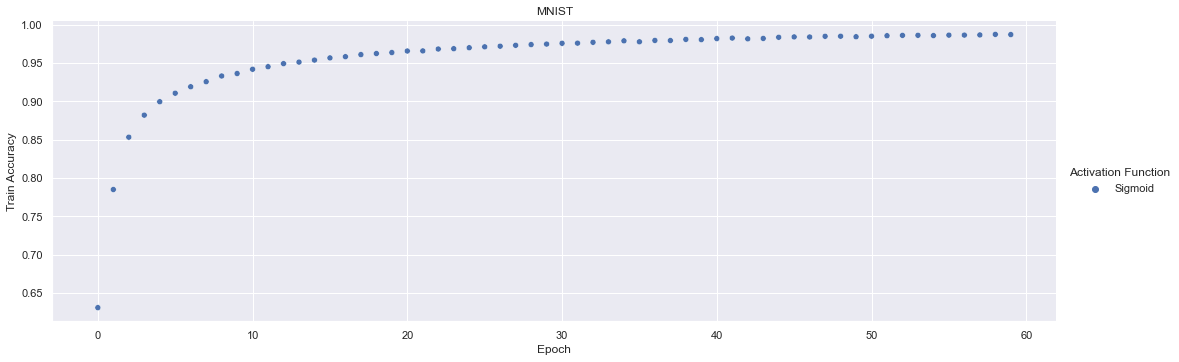

In [10]:
sns_plot = sns.relplot(data=df, x='Epoch', y='Train Accuracy', 
                        hue='Activation Function', kind='scatter', aspect=3,
                       ).set(title='MNIST')

In [11]:
sns_plot.savefig('output.png')